# SkimLit 🔥

In [ ]:
!nvidia-smi -L

GPU 0: Tesla T4 (UUID: GPU-6bb59cb4-2602-e3ff-7a47-505a7f7edf07)


In [ ]:
# Download the healper function
!wget https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/extras/helper_functions.py

--2023-05-18 20:25:35--  https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/extras/helper_functions.py
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.110.133, 185.199.111.133, 185.199.109.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.110.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 10246 (10K) [text/plain]
Saving to: ‘helper_functions.py’

helper_functions.py 100%[===================>]  10.01K  --.-KB/s    in 0s      

2023-05-18 20:25:35 (60.5 MB/s) - ‘helper_functions.py’ saved [10246/10246]



## Download The Datasete

The dataset that the peper used is free on [GitHub](https://github.com/Franck-Dernoncourt/pubmed-rct).

In [ ]:
!git clone https://github.com/Franck-Dernoncourt/pubmed-rct.git

Cloning into 'pubmed-rct'...
remote: Enumerating objects: 33, done.
remote: Counting objects: 100% (8/8), done.
remote: Compressing objects: 100% (3/3), done.
remote: Total 33 (delta 5), reused 5 (delta 5), pack-reused 25
Unpacking objects: 100% (33/33), 177.08 MiB | 13.01 MiB/s, done.


In [ ]:
!ls pubmed-rct/PubMed_20k_RCT_numbers_replaced_with_at_sign

dev.txt  test.txt  train.txt


The data already splited and the numbers been replaced with "@".

In [ ]:
data_dir = "/content/pubmed-rct/PubMed_20k_RCT_numbers_replaced_with_at_sign/"

In [ ]:
import os

filenames = [data_dir + filename for filename in os.listdir(data_dir)]
filenames

['/content/pubmed-rct/PubMed_20k_RCT_numbers_replaced_with_at_sign/train.txt',
 '/content/pubmed-rct/PubMed_20k_RCT_numbers_replaced_with_at_sign/test.txt',
 '/content/pubmed-rct/PubMed_20k_RCT_numbers_replaced_with_at_sign/dev.txt']

## Preprocessing The Data

### Convert lines to list

In [ ]:
def get_lines(filename):
  """
  Read a file and return the lines of the text as list.
  """
  with open(filename, 'r') as f:         #with: is manger to open some file. r: short for read. f: file when it get open then saves as f
    return f.readlines()                 # readlines(): This reads the lines from the file and return them as a list.

In [ ]:
train_lines = get_lines(data_dir + "train.txt")
train_lines[:20]

['###24293578\n',
 'OBJECTIVE\tTo investigate the efficacy of @ weeks of daily low-dose oral prednisolone in improving pain , mobility , and systemic low-grade inflammation in the short term and whether the effect would be sustained at @ weeks in older adults with moderate to severe knee osteoarthritis ( OA ) .\n',
 'METHODS\tA total of @ patients with primary knee OA were randomized @:@ ; @ received @ mg/day of prednisolone and @ received placebo for @ weeks .\n',
 'METHODS\tOutcome measures included pain reduction and improvement in function scores and systemic inflammation markers .\n',
 'METHODS\tPain was assessed using the visual analog pain scale ( @-@ mm ) .\n',
 'METHODS\tSecondary outcome measures included the Western Ontario and McMaster Universities Osteoarthritis Index scores , patient global assessment ( PGA ) of the severity of knee OA , and @-min walk distance ( @MWD ) .\n',
 'METHODS\tSerum levels of interleukin @ ( IL-@ ) , IL-@ , tumor necrosis factor ( TNF ) - , and 

In [ ]:
len(train_lines)

210040

### Extract the text with the label of each of line

In [ ]:
# We are going to write a function that can extract the text with the label of each of them
def preprocess_text_with_line_number(filename):
  input_lines = get_lines(filename) #get all lines from filename # it's list
  abstract_lines = ""
  abstract_samples = []

  for line in input_lines:
    if line.startswith("###"):    #check if the line is ID line which
      abstract_id = line
      abstract_lines=""           #rest the abstract lines if the line is ID
    elif line.isspace():          #check to see if the line is new line
      abstract_line_split = abstract_lines.splitlines()  #split abstraact into seprate lines

      #iterat through each line in a single abstract and
      for abstract_line_number, abstract_line in enumerate(abstract_line_split):
        line_data = {}
        target_text_split = abstract_line.split('\t')    #split target label from text
        line_data['target'] = target_text_split[0]   # the target donated by 0 after split the line and the text is 1
        line_data['text'] = target_text_split[1].lower()
        line_data['line_number'] = abstract_line_number
        line_data['total_lines'] = len(abstract_line_split) - 1
        abstract_samples.append(line_data) #add line data to abstract sample list
    else:
      abstract_lines += line
  return abstract_samples

In [ ]:
# preprocess data from file
%%time
train_samples = preprocess_text_with_line_number(data_dir + "train.txt")
val_samples = preprocess_text_with_line_number(data_dir + "dev.txt")
test_samples = preprocess_text_with_line_number(data_dir + "test.txt")
len(train_samples), len(val_samples), len(test_samples)

CPU times: user 359 ms, sys: 72 ms, total: 431 ms
Wall time: 432 ms


(180040, 30212, 30135)

In [ ]:
train_samples[:15]

[{'target': 'OBJECTIVE',
  'text': 'to investigate the efficacy of @ weeks of daily low-dose oral prednisolone in improving pain , mobility , and systemic low-grade inflammation in the short term and whether the effect would be sustained at @ weeks in older adults with moderate to severe knee osteoarthritis ( oa ) .',
  'line_number': 0,
  'total_lines': 11},
 {'target': 'METHODS',
  'text': 'a total of @ patients with primary knee oa were randomized @:@ ; @ received @ mg/day of prednisolone and @ received placebo for @ weeks .',
  'line_number': 1,
  'total_lines': 11},
 {'target': 'METHODS',
  'text': 'outcome measures included pain reduction and improvement in function scores and systemic inflammation markers .',
  'line_number': 2,
  'total_lines': 11},
 {'target': 'METHODS',
  'text': 'pain was assessed using the visual analog pain scale ( @-@ mm ) .',
  'line_number': 3,
  'total_lines': 11},
 {'target': 'METHODS',
  'text': 'secondary outcome measures included the western ontari

In [ ]:
# Visulize the data in dataframe
import pandas as pd

train_df = pd.DataFrame(train_samples)
test_df = pd.DataFrame(test_samples)
val_df = pd.DataFrame(val_samples)
train_df.head(15)

,target,text,line_number,total_lines
0,OBJECTIVE,to investigate the efficacy of @ weeks of dail...,0,11
1,METHODS,a total of @ patients with primary knee oa wer...,1,11
2,METHODS,outcome measures included pain reduction and i...,2,11
3,METHODS,pain was assessed using the visual analog pain...,3,11
4,METHODS,secondary outcome measures included the wester...,4,11
5,METHODS,"serum levels of interleukin @ ( il-@ ) , il-@ ...",5,11
6,RESULTS,there was a clinically relevant reduction in t...,6,11
7,RESULTS,the mean difference between treatment arms ( @...,7,11
8,RESULTS,"further , there was a clinically relevant redu...",8,11
9,RESULTS,these differences remained significant at @ we...,9,11


In [ ]:
train_df.target.value_counts()

METHODS        59353
RESULTS        57953
CONCLUSIONS    27168
BACKGROUND     21727
OBJECTIVE      13839
Name: target, dtype: int64

<Axes: ylabel='Frequency'>

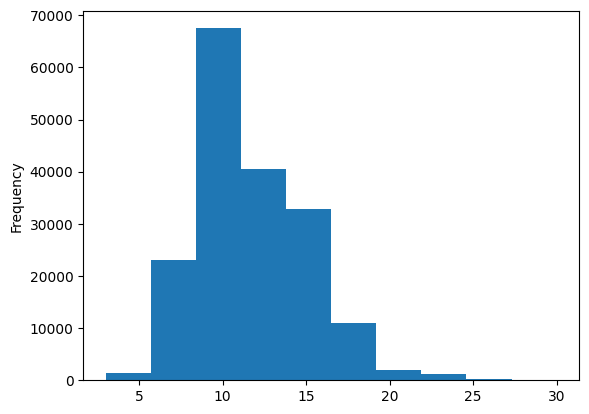

In [ ]:
# Number of lines in abstracts
train_df.total_lines.plot.hist()

### Training, Testing and Validation Data

In [ ]:
train_sentences = train_df['text'].to_numpy()
test_sentences = test_df['text'].to_numpy()
val_sentences = val_df['text'].to_numpy()
len(train_sentences), len(test_sentences), len(val_sentences)

(180040, 30135, 30212)

In [ ]:
train_sentences[:10]

array(['to investigate the efficacy of @ weeks of daily low-dose oral prednisolone in improving pain , mobility , and systemic low-grade inflammation in the short term and whether the effect would be sustained at @ weeks in older adults with moderate to severe knee osteoarthritis ( oa ) .',
       'a total of @ patients with primary knee oa were randomized @:@ ; @ received @ mg/day of prednisolone and @ received placebo for @ weeks .',
       'outcome measures included pain reduction and improvement in function scores and systemic inflammation markers .',
       'pain was assessed using the visual analog pain scale ( @-@ mm ) .',
       'secondary outcome measures included the western ontario and mcmaster universities osteoarthritis index scores , patient global assessment ( pga ) of the severity of knee oa , and @-min walk distance ( @mwd ) .',
       'serum levels of interleukin @ ( il-@ ) , il-@ , tumor necrosis factor ( tnf ) - , and high-sensitivity c-reactive protein ( hscrp ) we

### Labels
Convert the labels to numeric  

#### One hot

In [ ]:
#one hot encoder
from sklearn.preprocessing import OneHotEncoder
one_hot_encoder = OneHotEncoder(sparse=False)   #tensorflow is incompatible with sparse matrix data
train_labels_one_hot = one_hot_encoder.fit_transform(train_df['target'].to_numpy().reshape(-1,1))
val_labels_one_hot = one_hot_encoder.transform(val_df['target'].to_numpy().reshape(-1,1))
test_labels_one_hot = one_hot_encoder.transform(test_df['target'].to_numpy().reshape(-1,1))

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [ ]:
train_labels_one_hot

array([[0., 0., 0., 1., 0.],
       [0., 0., 1., 0., 0.],
       [0., 0., 1., 0., 0.],
       ...,
       [0., 0., 0., 0., 1.],
       [0., 1., 0., 0., 0.],
       [0., 1., 0., 0., 0.]])

#### Label Encoder label

In [ ]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
train_labels = label_encoder.fit_transform(train_df['target'].to_numpy())
val_labels = label_encoder.transform(val_df['target'].to_numpy())
test_labels = label_encoder.transform(test_df['target'].to_numpy())

train_labels

array([3, 2, 2, ..., 4, 1, 1])

In [ ]:
# Get the class from the number
classes_names = label_encoder.classes_
num_classes = len(label_encoder.classes_)
classes_names, num_classes

(array(['BACKGROUND', 'CONCLUSIONS', 'METHODS', 'OBJECTIVE', 'RESULTS'],
       dtype=object),
 5)

## Model 0: Naive Base

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import Pipeline

model_0 = Pipeline([
    ("tfidf", TfidfVectorizer()),
    ("clf", MultinomialNB())

])
model_0.fit(train_sentences, train_labels)

Pipeline(steps=[('tfidf', TfidfVectorizer()), ('clf', MultinomialNB())])

In [ ]:
model_0.score(val_sentences, val_labels)

0.7218323844829869

In [ ]:
# We will predict the val_sentences to calculate the resultes useing our function from the last notebook
model_0_pred = model_0.predict(val_sentences)
model_0_pred

array([4, 1, 3, ..., 4, 4, 1])

In [ ]:
from helper_functions import calculate_results

In [ ]:
model_0_results = calculate_results(val_labels,
                                    model_0_pred)
model_0_results

{'accuracy': 72.1832384482987,
 'precision': 0.7186466952323352,
 'recall': 0.7218323844829869,
 'f1': 0.6989250353450294}

## Model 1: Conv1D (Token Embedding)

### Vectorization Layer

In [ ]:
#first we need to vectorization and Embedding function
import tensorflow as tf
from tensorflow.keras.layers.experimental.preprocessing import TextVectorization
text_vectorization = TextVectorization(max_tokens=68000,
                                       output_sequence_length=55)

In [ ]:
text_vectorization.adapt(train_sentences)

In [ ]:
text_vectorization([train_sentences[6]])

<tf.Tensor: shape=(1, 55), dtype=int64, numpy=
array([[  61,   10,    8,  463,  963,  169,    5,    2,   38,   13,   34,
           6,    2,   48,   13,   11,  517,   65,  189,  149, 7813,    3,
        6374,   15,   53,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0]])>

In [ ]:
text_vectorization.get_config()

{'name': 'text_vectorization',
 'trainable': True,
 'dtype': 'string',
 'batch_input_shape': (None,),
 'max_tokens': 68000,
 'standardize': 'lower_and_strip_punctuation',
 'split': 'whitespace',
 'ngrams': None,
 'output_mode': 'int',
 'output_sequence_length': 55,
 'pad_to_max_tokens': False,
 'sparse': False,
 'ragged': False,
 'vocabulary': None,
 'idf_weights': None,
 'encoding': 'utf-8',
 'vocabulary_size': 64841}

### Embedding Layer

In [ ]:
from tensorflow.keras.layers import Embedding
embedding = Embedding(input_dim =68000,
                      output_dim=128,
                      input_length=55,
                      mask_zero=True)  # it's save space by masking the zeros

In [ ]:
embedding(text_vectorization([train_sentences[7]]))

<tf.Tensor: shape=(1, 55, 128), dtype=float32, numpy=
array([[[ 0.02873177,  0.00271832, -0.02168219, ..., -0.00433027,
          0.04416129,  0.0228472 ],
        [-0.03623977, -0.029125  , -0.02496783, ...,  0.0163259 ,
         -0.01958071,  0.038048  ],
        [ 0.00325416,  0.0317886 , -0.02401689, ...,  0.03966739,
         -0.04962504, -0.04041524],
        ...,
        [-0.01060846,  0.04613197, -0.00488545, ...,  0.04799381,
         -0.02737614, -0.03453145],
        [-0.01060846,  0.04613197, -0.00488545, ...,  0.04799381,
         -0.02737614, -0.03453145],
        [-0.01060846,  0.04613197, -0.00488545, ...,  0.04799381,
         -0.02737614, -0.03453145]]], dtype=float32)>

### The Model

In [ ]:
from tensorflow.keras import layers

inputs = layers.Input(shape=(1,), dtype=tf.string)
x = text_vectorization(inputs)
x = embedding(x)
x = layers.Conv1D(128, 4, padding='same', activation='relu')(x)
x = layers.GlobalAveragePooling1D()(x)
outputs = layers.Dense(5, activation='softmax')(x)
model_1 = tf.keras.Model(inputs, outputs, name='model_1_CNN')

In [ ]:
model_1.summary()

Model: "model_1_CNN"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 1)]               0         
                                                                 
 text_vectorization (TextVec  (None, 55)               0         
 torization)                                                     
                                                                 
 embedding (Embedding)       (None, 55, 128)           8704000   
                                                                 
 conv1d (Conv1D)             (None, 55, 128)           65664     
                                                                 
 global_average_pooling1d (G  (None, 128)              0         
 lobalAveragePooling1D)                                          
                                                                 
 dense (Dense)               (None, 5)                 

In [ ]:
model_1.compile(loss='sparse_categorical_crossentropy', #If you want to use "categorical_crossentropy", the labels should be one-hot-encoded. When your labels are given as an integer, changing to "sparse_categorical_crossentropy" is required
                optimizer=tf.keras.optimizers.Adam(),
                metrics=['accuracy'])

In [ ]:
model_1_history = model_1.fit(train_sentences,
                              train_labels,
                              epochs=5,
                              validation_data=(val_sentences, val_labels))

Epoch 1/5
5627/5627 [==============================] - 95s 15ms/step - loss: 0.6054 - accuracy: 0.7798 - val_loss: 0.5167 - val_accuracy: 0.8139
Epoch 2/5
5627/5627 [==============================] - 48s 9ms/step - loss: 0.4347 - accuracy: 0.8476 - val_loss: 0.5127 - val_accuracy: 0.8162
Epoch 3/5
5627/5627 [==============================] - 46s 8ms/step - loss: 0.3486 - accuracy: 0.8801 - val_loss: 0.5495 - val_accuracy: 0.8104
Epoch 4/5
5627/5627 [==============================] - 45s 8ms/step - loss: 0.2820 - accuracy: 0.9045 - val_loss: 0.6093 - val_accuracy: 0.8048
Epoch 5/5
5627/5627 [==============================] - 46s 8ms/step - loss: 0.2287 - accuracy: 0.9239 - val_loss: 0.6733 - val_accuracy: 0.7970


In [ ]:
model_1_pred_prob = model_1.predict(val_sentences)
model_1_pred_prob

945/945 [==============================] - 2s 2ms/step


array([[9.15998399e-01, 1.26476618e-04, 6.40387759e-02, 1.77009273e-02,
        2.13544234e-03],
       [4.12210166e-01, 1.58223376e-01, 5.77549171e-03, 4.12541538e-01,
        1.12493131e-02],
       [2.63475999e-03, 1.79235267e-05, 7.18614738e-03, 9.90109324e-01,
        5.18038287e-05],
       ...,
       [3.34470123e-08, 4.07285688e-06, 5.76430699e-03, 4.97905205e-07,
        9.94231105e-01],
       [1.22942701e-02, 1.43179551e-01, 6.78192437e-01, 5.38752368e-03,
        1.60946175e-01],
       [4.14110575e-04, 9.98587370e-01, 5.28829813e-04, 1.19307915e-05,
        4.57752642e-04]], dtype=float32)

In [ ]:
model_1_pred = tf.round(model_1_pred_prob)
model_1_pred

<tf.Tensor: shape=(30212, 5), dtype=float32, numpy=
array([[1., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0.],
       ...,
       [0., 0., 0., 0., 1.],
       [0., 0., 1., 0., 0.],
       [0., 1., 0., 0., 0.]], dtype=float32)>

In [ ]:
model_1_results = calculate_results(val_labels_one_hot,
                                    model_1_pred)
model_1_results

{'accuracy': 78.33642261353104,
 'precision': 0.8063921565783804,
 'recall': 0.7833642261353104,
 'f1': 0.7940125065632226}

## Creating The Dataset (make it fast)

In [ ]:
train_dataset = tf.data.Dataset.from_tensor_slices((train_sentences, train_labels_one_hot))
val_dataset = tf.data.Dataset.from_tensor_slices((val_sentences, val_labels_one_hot))
test_dataset = tf.data.Dataset.from_tensor_slices((test_sentences, test_labels_one_hot))

train_dataset

<_TensorSliceDataset element_spec=(TensorSpec(shape=(), dtype=tf.string, name=None), TensorSpec(shape=(5,), dtype=tf.float64, name=None))>

In [ ]:
# tuen the dataset into prefectch dataset
train_dataset = train_dataset.batch(32).prefetch(tf.data.AUTOTUNE)
val_dataset = val_dataset.batch(32).prefetch(tf.data.AUTOTUNE)
test_dataset = test_dataset.batch(32).prefetch(tf.data.AUTOTUNE)

train_dataset

<_PrefetchDataset element_spec=(TensorSpec(shape=(None,), dtype=tf.string, name=None), TensorSpec(shape=(None, 5), dtype=tf.float64, name=None))>

## Model 2: CNN with prefetched dataset

In [ ]:
import tensorflow as tf
from tensorflow.keras import layers

inputs = layers.Input(shape=(1,), dtype=tf.string)
x = text_vectorization(inputs)
x = embedding(x)
x = layers.Conv1D(128, 5, padding='same', activation='relu')(x)
x = layers.GlobalMaxPooling1D()(x)
outputs = layers.Dense(5, activation='softmax')(x)
model_2 = tf.keras.Model(inputs, outputs, name='model_2_CNN')

In [ ]:
model_2.compile(loss = 'categorical_crossentropy',
                optimizer=tf.keras.optimizers.Adam(),
                metrics=['accuracy'])

In [ ]:
model_2_history = model_2.fit(train_dataset,
                              steps_per_epoch=int(0.5*len(train_dataset)),
                              epochs=3,
                              validation_data=val_dataset,
                              validation_steps=int(0.1*len(val_dataset)))

Epoch 1/5
2813/2813 [==============================] - 20s 7ms/step - loss: 0.2791 - accuracy: 0.9082 - val_loss: 0.5271 - val_accuracy: 0.8175
Epoch 2/5
2813/2813 [==============================] - 23s 8ms/step - loss: 0.5098 - accuracy: 0.8125 - val_loss: 0.4860 - val_accuracy: 0.8231
Epoch 3/5
   1/2813 [..............................] - ETA: 12:17 - loss: 0.3388 - accuracy: 0.8750

2813/2813 [==============================] - 1s 103us/step - loss: 0.3388 - accuracy: 0.8750 - val_loss: 0.4888 - val_accuracy: 0.8215


In [ ]:
model_2_pred_prob = model_2.predict(val_dataset)
model_2_pred = tf.round(model_2_pred_prob)
model_2_pred

945/945 [==============================] - 2s 2ms/step


<tf.Tensor: shape=(30212, 5), dtype=float32, numpy=
array([[0., 0., 1., 0., 0.],
       [0., 0., 0., 1., 0.],
       [0., 0., 0., 1., 0.],
       ...,
       [0., 0., 0., 0., 1.],
       [0., 1., 0., 0., 0.],
       [0., 1., 0., 0., 0.]], dtype=float32)>

In [ ]:
model_2_results = calculate_results(val_labels_one_hot,
                  model_2_pred)
model_2_results

{'accuracy': 75.63219912617502,
 'precision': 0.764578412979688,
 'recall': 0.7563219912617503,
 'f1': 0.7598019566168005}

## Feature Extractor

In the paper thay used Glove embedding layer but hear we are going to uve tensorflow hub embedding layer (unversal embedding layer)

In [ ]:
import tensorflow_hub as hub

tf_hub_embedding_layer = hub.KerasLayer('https://tfhub.dev/google/universal-sentence-encoder/4')

In [ ]:
#Test the embedding layer
import random
sentence = random.choice(train_sentences)
print(f'The training sentence:\n{sentence}\n')
embed_sentence = tf_hub_embedding_layer([sentence])
print(f'The embedding of the sentence:\n{embed_sentence[0][:20]}')

The training sentence:
data were analyzed in spss , version @ in march @ .

The embedding of the sentence:
[-0.00305136 -0.0038147  -0.06033308  0.03065435  0.04454195 -0.06899639
 -0.07100344  0.01230097  0.00501361  0.01657644  0.00839804 -0.07442837
 -0.01377368  0.03282856 -0.067186    0.03836744 -0.04653798 -0.0269672
  0.06378473 -0.06795757]


### Model 3

In [ ]:
input = layers.Input(shape=[], dtype=tf.string)
x = tf_hub_embedding_layer(input)
x = layers.Dense(128, activation='relu')(x)
output = layers.Dense(5, activation='softmax')(x)
model_3 = tf.keras.Model(input, output)

model_3.compile(loss='categorical_crossentropy',
                optimizer=tf.keras.optimizers.Adam(),
                metrics=['accuracy'])

In [ ]:
model_3_history = model_3.fit(train_dataset,
                              steps_per_epoch=len(train_dataset),
                              epochs=3,
                              validation_data=val_dataset,
                              validation_steps=int(0.1*len(val_dataset)))

Epoch 1/3
5627/5627 [==============================] - 113s 19ms/step - loss: 0.7291 - accuracy: 0.7219 - val_loss: 0.6533 - val_accuracy: 0.7517
Epoch 2/3
5627/5627 [==============================] - 78s 14ms/step - loss: 0.6346 - accuracy: 0.7598 - val_loss: 0.6161 - val_accuracy: 0.7696
Epoch 3/3
5627/5627 [==============================] - 67s 12ms/step - loss: 0.6002 - accuracy: 0.7726 - val_loss: 0.6034 - val_accuracy: 0.7773


In [ ]:
model_3.evaluate(val_dataset)

945/945 [==============================] - 11s 11ms/step - loss: 0.6071 - accuracy: 0.7686


[0.6070851683616638, 0.7686349749565125]

In [ ]:
model_3_pred_prob=model_3.predict(val_dataset)
model_3_pred=tf.round(model_3_pred_prob)
model_3_pred

945/945 [==============================] - 10s 10ms/step


<tf.Tensor: shape=(30212, 5), dtype=float32, numpy=
array([[1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       ...,
       [0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 1.],
       [0., 1., 0., 0., 0.]], dtype=float32)>

In [ ]:
model_3_results = calculate_results(val_labels_one_hot,
                                    model_3_pred)
model_3_results

{'accuracy': 72.04091089633259,
 'precision': 0.8091366558723276,
 'recall': 0.7204091089633259,
 'f1': 0.7546256265993742}

## Model 4: CNN (Character Embedding)

### Tokenization

In [ ]:
list(train_sentences[0])

['t',
 'o',
 ' ',
 'i',
 'n',
 'v',
 'e',
 's',
 't',
 'i',
 'g',
 'a',
 't',
 'e',
 ' ',
 't',
 'h',
 'e',
 ' ',
 'e',
 'f',
 'f',
 'i',
 'c',
 'a',
 'c',
 'y',
 ' ',
 'o',
 'f',
 ' ',
 '@',
 ' ',
 'w',
 'e',
 'e',
 'k',
 's',
 ' ',
 'o',
 'f',
 ' ',
 'd',
 'a',
 'i',
 'l',
 'y',
 ' ',
 'l',
 'o',
 'w',
 '-',
 'd',
 'o',
 's',
 'e',
 ' ',
 'o',
 'r',
 'a',
 'l',
 ' ',
 'p',
 'r',
 'e',
 'd',
 'n',
 'i',
 's',
 'o',
 'l',
 'o',
 'n',
 'e',
 ' ',
 'i',
 'n',
 ' ',
 'i',
 'm',
 'p',
 'r',
 'o',
 'v',
 'i',
 'n',
 'g',
 ' ',
 'p',
 'a',
 'i',
 'n',
 ' ',
 ',',
 ' ',
 'm',
 'o',
 'b',
 'i',
 'l',
 'i',
 't',
 'y',
 ' ',
 ',',
 ' ',
 'a',
 'n',
 'd',
 ' ',
 's',
 'y',
 's',
 't',
 'e',
 'm',
 'i',
 'c',
 ' ',
 'l',
 'o',
 'w',
 '-',
 'g',
 'r',
 'a',
 'd',
 'e',
 ' ',
 'i',
 'n',
 'f',
 'l',
 'a',
 'm',
 'm',
 'a',
 't',
 'i',
 'o',
 'n',
 ' ',
 'i',
 'n',
 ' ',
 't',
 'h',
 'e',
 ' ',
 's',
 'h',
 'o',
 'r',
 't',
 ' ',
 't',
 'e',
 'r',
 'm',
 ' ',
 'a',
 'n',
 'd',
 ' ',
 'w',
 'h',
 'e'

In [ ]:
" ".join(list(train_sentences[0]))

't o   i n v e s t i g a t e   t h e   e f f i c a c y   o f   @   w e e k s   o f   d a i l y   l o w - d o s e   o r a l   p r e d n i s o l o n e   i n   i m p r o v i n g   p a i n   ,   m o b i l i t y   ,   a n d   s y s t e m i c   l o w - g r a d e   i n f l a m m a t i o n   i n   t h e   s h o r t   t e r m   a n d   w h e t h e r   t h e   e f f e c t   w o u l d   b e   s u s t a i n e d   a t   @   w e e k s   i n   o l d e r   a d u l t s   w i t h   m o d e r a t e   t o   s e v e r e   k n e e   o s t e o a r t h r i t i s   (   o a   )   .'

In [ ]:
# Make function to split each sentences into charcters
def split_chars(text):
  return " ".join(list(text))

In [ ]:
train_chars = [split_chars(sentence) for sentence in train_sentences]
val_chars = [split_chars(sentence) for sentence in val_sentences]
test_chars = [split_chars(sentence) for sentence in test_sentences]

train_chars[:5]

['t o   i n v e s t i g a t e   t h e   e f f i c a c y   o f   @   w e e k s   o f   d a i l y   l o w - d o s e   o r a l   p r e d n i s o l o n e   i n   i m p r o v i n g   p a i n   ,   m o b i l i t y   ,   a n d   s y s t e m i c   l o w - g r a d e   i n f l a m m a t i o n   i n   t h e   s h o r t   t e r m   a n d   w h e t h e r   t h e   e f f e c t   w o u l d   b e   s u s t a i n e d   a t   @   w e e k s   i n   o l d e r   a d u l t s   w i t h   m o d e r a t e   t o   s e v e r e   k n e e   o s t e o a r t h r i t i s   (   o a   )   .',
 'a   t o t a l   o f   @   p a t i e n t s   w i t h   p r i m a r y   k n e e   o a   w e r e   r a n d o m i z e d   @ : @   ;   @   r e c e i v e d   @   m g / d a y   o f   p r e d n i s o l o n e   a n d   @   r e c e i v e d   p l a c e b o   f o r   @   w e e k s   .',
 'o u t c o m e   m e a s u r e s   i n c l u d e d   p a i n   r e d u c t i o n   a n d   i m p r o v e m e n t   i n   f u n c t i o n   s c o r e s   a 

In [ ]:
import numpy as np

char_lens = [len(sentence) for sentence in train_sentences]
mean_char_len = np.mean(char_lens)
mean_char_len

149.3662574983337

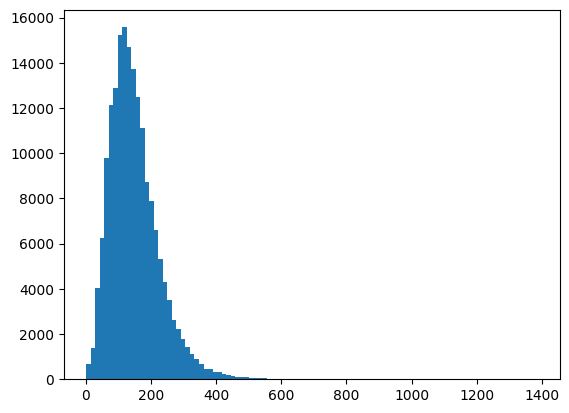

In [ ]:
# The distribution of our sequences at a character-level
import matplotlib.pyplot as plt
plt.hist(char_lens, bins=100);

In [ ]:
# Fined what character length covers 95% of sequences
output_char_len = int(np.percentile(char_lens, 95))
output_char_len

290

In [ ]:
import string                                              #max_tokens is the number of alphabet
alphabet= string.ascii_lowercase + string.digits + string.punctuation
alphabet

'abcdefghijklmnopqrstuvwxyz0123456789!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

we will use the alphabet len as max_tokens

In [ ]:
#Tokenizer
from tensorflow.keras.layers.experimental.preprocessing import TextVectorization

NUM_OF_MAX_TOKENS = len(alphabet) + 2 # The two for space and voo token
char_vectorization = TextVectorization(max_tokens=NUM_OF_MAX_TOKENS,
                                       output_sequence_length=290)

In [ ]:
char_vectorization.adapt(train_chars)

In [ ]:
# Info about the vocabulary
chars_vocab = char_vectorization.get_vocabulary()
print(f"The vocab elements:\n{chars_vocab}\n")
print(f"Vocab length {len(chars_vocab)}\n")
print(f"Most 5 vocabs: {chars_vocab[:5]}\n")
print(f"least 5 vocabs: {chars_vocab[-5:]}")

The vocab elements:
['', '[UNK]', 'e', 't', 'i', 'a', 'n', 'o', 'r', 's', 'd', 'c', 'l', 'h', 'p', 'm', 'u', 'f', 'g', 'y', 'w', 'v', 'b', 'k', 'x', 'z', 'q', 'j']

Vocab length 28

Most 5 vocabs: ['', '[UNK]', 'e', 't', 'i']

least 5 vocabs: ['k', 'x', 'z', 'q', 'j']


In [ ]:
import random
random_char = random.choice(train_chars)
print(f"The random sentence:\n {random_char}\n")
toknized_char = char_vectorization([random_char])
print(f"The toknization:\n {toknized_char}")
print(toknized_char.shape)

The random sentence:
 t h e   t r e a t m e n t   g r o u p   c o n s i s t e d   o f   @   p r o s p e c t i v e l y   a n d   r a n d o m l y   a s s i g n e d   p a t i e n t s   .

The toknization:
 [[ 3 13  2  3  8  2  5  3 15  2  6  3 18  8  7 16 14 11  7  6  9  4  9  3
   2 10  7 17 14  8  7  9 14  2 11  3  4 21  2 12 19  5  6 10  8  5  6 10
   7 15 12 19  5  9  9  4 18  6  2 10 14  5  3  4  2  6  3  9  0  0  0  0
   0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
   0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
   0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
   0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
   0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
   0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
   0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
   0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  

###Embedding

In [ ]:
import tensorflow as tf
from tensorflow.keras import layers

char_embed = layers.Embedding(input_dim=len(chars_vocab),
                              output_dim=25,  #each char get embed into 25 vecor size
                              mask_zero=True)

In [ ]:
print(f'Random sentence: \n{random_char}\n')
embed_random_char=char_embed(char_vectorization([random_char]))
print(f'Embed the sentence is:\n{embed_random_char}')
print(f'\nThe shape is: {embed_random_char.shape}')

Random sentence: 
t h e   t r e a t m e n t   g r o u p   c o n s i s t e d   o f   @   p r o s p e c t i v e l y   a n d   r a n d o m l y   a s s i g n e d   p a t i e n t s   .

Embed the sentence is:
[[[ 0.0055578   0.029101   -0.01674714 ...  0.04137695  0.02265682
    0.04988192]
  [ 0.01318714  0.01637644  0.03864071 ... -0.01284549 -0.00367941
    0.04891482]
  [-0.03762581 -0.04182803 -0.04039934 ...  0.02809042 -0.01474503
   -0.01844473]
  ...
  [ 0.01704446  0.01416235 -0.02855444 ...  0.04612447 -0.00364015
   -0.01099446]
  [ 0.01704446  0.01416235 -0.02855444 ...  0.04612447 -0.00364015
   -0.01099446]
  [ 0.01704446  0.01416235 -0.02855444 ...  0.04612447 -0.00364015
   -0.01099446]]]

The shape is: (1, 290, 25)


### The model

In [ ]:
inputs = layers.Input(shape=(1,), dtype='string')
x = char_vectorization(inputs)
x = char_embed(x)
x = layers.Conv1D(64, 5, padding='same', activation='relu')(x)
x= layers.GlobalAveragePooling1D()(x)
outputs=layers.Dense(5, activation='softmax')(x)
model_4= tf.keras.Model(inputs, outputs)

model_4.compile(loss='categorical_crossentropy',
                optimizer=tf.keras.optimizers.Adam(),
                metrics=['accuracy'])

In [ ]:
model_4.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_3 (InputLayer)        [(None, 1)]               0         
                                                                 
 text_vectorization_1 (TextV  (None, 290)              0         
 ectorization)                                                   
                                                                 
 embedding_1 (Embedding)     (None, 290, 25)           700       
                                                                 
 conv1d_2 (Conv1D)           (None, 290, 64)           8064      
                                                                 
 global_average_pooling1d_1   (None, 64)               0         
 (GlobalAveragePooling1D)                                        
                                                                 
 dense_2 (Dense)             (None, 5)                 325   

In [ ]:
# Create char level datasets
train_char_dataset = tf.data.Dataset.from_tensor_slices((train_chars, train_labels_one_hot)).batch(32).prefetch(tf.data.AUTOTUNE)
val_char_dataset = tf.data.Dataset.from_tensor_slices((val_chars, val_labels_one_hot)).batch(32).prefetch(tf.data.AUTOTUNE)
test_char_dataset = tf.data.Dataset.from_tensor_slices((test_chars, test_labels_one_hot)).batch(32).prefetch(tf.data.AUTOTUNE)

train_char_dataset

<_PrefetchDataset element_spec=(TensorSpec(shape=(None,), dtype=tf.string, name=None), TensorSpec(shape=(None, 5), dtype=tf.float64, name=None))>

In [ ]:
model_4_history=model_4.fit(train_char_dataset,
                              steps_per_epoch=int(0.1* len(train_char_dataset)),
                              epochs=3,
                              validation_data=val_char_dataset,
                              validation_steps=int(0.1*len(val_char_dataset)))

Epoch 1/3
562/562 [==============================] - 5s 8ms/step - loss: 1.4556 - accuracy: 0.3528 - val_loss: 1.3957 - val_accuracy: 0.4036
Epoch 2/3
562/562 [==============================] - 4s 7ms/step - loss: 1.3528 - accuracy: 0.4276 - val_loss: 1.3233 - val_accuracy: 0.4511
Epoch 3/3
562/562 [==============================] - 3s 5ms/step - loss: 1.3167 - accuracy: 0.4553 - val_loss: 1.3086 - val_accuracy: 0.4445


In [ ]:
model_4.evaluate(val_char_dataset)

945/945 [==============================] - 5s 5ms/step - loss: 1.0684 - accuracy: 0.5707


[1.0683954954147339, 0.5706672668457031]

In [ ]:
model_4_pred_prob = model_4.predict(val_char_dataset)
model_4_pred= tf.argmax(model_4_pred_prob, axis=1)
model_4_pred

945/945 [==============================] - 3s 3ms/step


<tf.Tensor: shape=(30212,), dtype=int64, numpy=array([1, 4, 2, ..., 4, 2, 0])>

In [ ]:
model_4_results = calculate_results(val_labels,
                                    model_4_pred)
model_4_results

{'accuracy': 57.066728452270624,
 'precision': 0.5430638916905006,
 'recall': 0.5706672845227062,
 'f1': 0.5447518514634827}

## Model 5: Combining token embedding and characters embedding

1. Create a token-level embedding model.
2. Create a character-level embedding model.
3. combine 1 and 2 with concatenate(`layers.Concatenate`).
4. build a series of output layers on top of 3

https://arxiv.org/pdf/1612.05251.pdf

### The main model

In [ ]:
# 1. setup token inputs/model
token_inputs= layers.Input(shape=[], dtype='string', name='token_input') #the shape is empty list because of unvirsal sentence encoder
token_embeddings = tf_hub_embedding_layer(token_inputs)
token_outputs = layers.Dense(128, activation='relu')(token_embeddings)
token_model = tf.keras.Model(inputs=token_inputs,
                             outputs=token_outputs)

# 2. setup char inputs/model
char_inputs = layers.Input(shape=(1,), dtype='string', name='char_input')
char_vectors = char_vectorization(char_inputs)
char_embeddings = char_embed(char_vectors)
char_bi_lstm = layers.Bidirectional(layers.LSTM(24))(char_embeddings)
char_model = tf.keras.Model(inputs=char_inputs,
                            outputs= char_bi_lstm)

# 3. Concatenate
token_char_concat = layers.Concatenate(name='token_char_hybrid')([token_model.output,
                                                                  char_model.output])  #we bus it the output of one and two and combining them using layer Concatenate
# 4. Create output layer - adding Dropout
combined_dropout = layers.Dropout(rate=0.5)(token_char_concat)
combined_dense = layers.Dense(128, activation='relu')(combined_dropout)
final_dropout = layers.Dropout(rate=0.5)(combined_dense)
output_layer = layers.Dense(5, activation='softmax')(final_dropout)

# 5. Construct model with char and token inputs
model_5 = tf.keras.Model(inputs=[token_inputs, char_inputs],
                         outputs=output_layer,
                         name='model_5_token_and_char_embeddings')

In [ ]:
model_5.summary()

Model: "model_5_token_and_char_embeddings"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 char_input (InputLayer)        [(None, 1)]          0           []                               
                                                                                                  
 token_input (InputLayer)       [(None,)]            0           []                               
                                                                                                  
 text_vectorization_1 (TextVect  (None, 290)         0           ['char_input[0][0]']             
 orization)                                                                                       
                                                                                                  
 keras_layer (KerasLayer)       (None, 512)          256797824   [

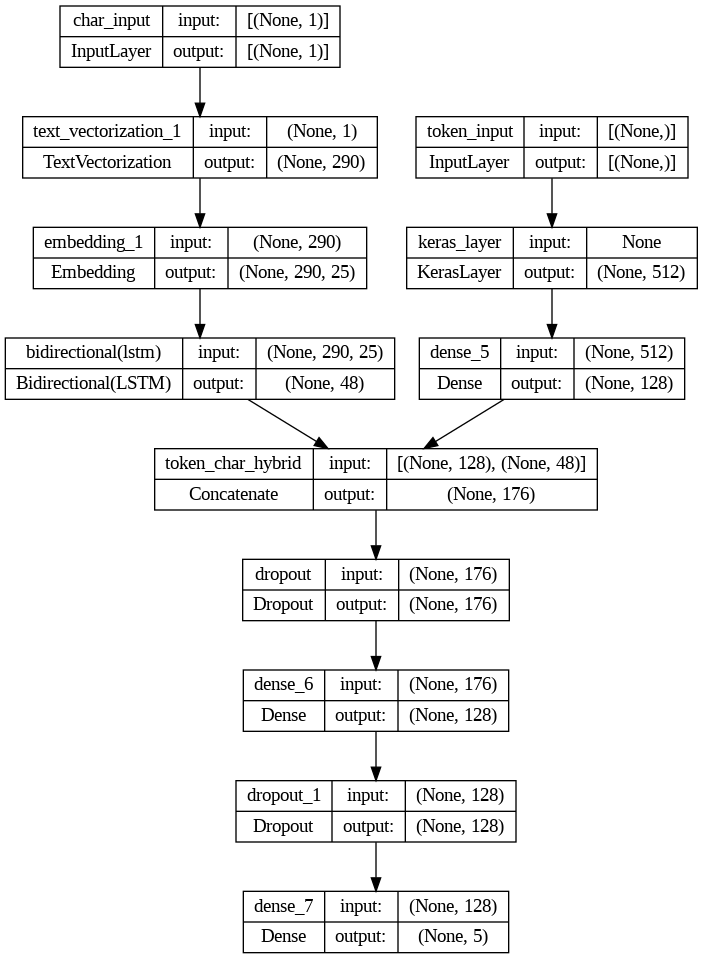

In [ ]:
# plot hybrid model
from keras.utils import plot_model
plot_model(model_5, show_shapes=True)

In [ ]:
#Compile
model_5.compile(loss='categorical_crossentropy',
                optimizer=tf.keras.optimizers.SGD(),
                metrics='accuracy')

### Creating Dataset

In [ ]:
train_concate_dataset = tf.data.Dataset.from_tensor_slices(((train_sentences, train_chars), train_labels_one_hot)).batch(32).prefetch(tf.data.AUTOTUNE)

In [ ]:
#train_concat_data = tf.data.Dataset.from_tensor_slices((train_sentences, train_chars))
#train_concat_data_labels = tf.data.Dataset.from_tensor_slices(train_labels_one_hot)
#train_concate = tf.data.Dataset.zip((train_concat_data, train_concat_data_labels))
#train_concate_dataset = train_concate.batch(32).prefetch(tf.data.AUTOTUNE)

In [ ]:
val_concate_data = tf.data.Dataset.from_tensor_slices((val_sentences, val_chars))
val_concate_data_labels = tf.data.Dataset.from_tensor_slices(val_labels_one_hot)
val_concate=tf.data.Dataset.zip((val_concate_data, val_concate_data_labels))
val_concate_dataset=val_concate.batch(32).prefetch(tf.data.AUTOTUNE)

### Fit the model

In [ ]:
model_5_history = model_5.fit(train_concate_dataset,
                              epochs=3,
                              steps_per_epoch=len(train_concate_dataset),
                              validation_data=val_concate_dataset,
                              validation_steps=int(0.1*len(val_concate_dataset)))

Epoch 1/3
5627/5627 [==============================] - 269s 46ms/step - loss: 1.2181 - accuracy: 0.4991 - val_loss: 0.9005 - val_accuracy: 0.6396
Epoch 2/3
5627/5627 [==============================] - 257s 46ms/step - loss: 0.9368 - accuracy: 0.6220 - val_loss: 0.8363 - val_accuracy: 0.6616
Epoch 3/3
5627/5627 [==============================] - 251s 45ms/step - loss: 0.8826 - accuracy: 0.6486 - val_loss: 0.7992 - val_accuracy: 0.6858


In [ ]:
model_5.evaluate(val_concate_dataset)

945/945 [==============================] - 20s 22ms/step - loss: 0.7982 - accuracy: 0.6831


[0.7982057929039001, 0.6831391453742981]

In [ ]:
model_5_pred_prob = model_5.predict(val_concate_dataset)
model_5_pred = tf.argmax(model_5_pred_prob, axis=1)
model_5_pred

945/945 [==============================] - 23s 21ms/step


<tf.Tensor: shape=(30212,), dtype=int64, numpy=array([1, 1, 1, ..., 4, 4, 2])>

In [ ]:
model_5_results = calculate_results(y_true=val_labels,
                                    y_pred=model_5_pred)
model_5_results

{'accuracy': 68.31391500066198,
 'precision': 0.6825716141467604,
 'recall': 0.6831391500066198,
 'f1': 0.6734449967675705}

## Model 6: Adding Positional Embeddings

In [ ]:
train_df

,target,text,line_number,total_lines
0,OBJECTIVE,to investigate the efficacy of @ weeks of dail...,0,11
1,METHODS,a total of @ patients with primary knee oa wer...,1,11
2,METHODS,outcome measures included pain reduction and i...,2,11
3,METHODS,pain was assessed using the visual analog pain...,3,11
4,METHODS,secondary outcome measures included the wester...,4,11
...,...,...,...,...
180035,RESULTS,for the absolute change in percent atheroma vo...,7,11
180036,RESULTS,"for pav , a significantly greater percentage o...",8,11
180037,RESULTS,both strategies had acceptable side effect pro...,9,11
180038,CONCLUSIONS,"compared with standard statin monotherapy , th...",10,11


In [ ]:
test_df

,target,text,line_number,total_lines
0,BACKGROUND,this study analyzed liver function abnormaliti...,0,8
1,RESULTS,a post hoc analysis was conducted with the use...,1,8
2,RESULTS,liver function tests ( lfts ) were measured at...,2,8
3,RESULTS,survival analyses were used to assess the asso...,3,8
4,RESULTS,the percentage of patients with abnormal lfts ...,4,8
...,...,...,...,...
30130,RESULTS,there was a statistically significant between-...,13,17
30131,RESULTS,there were no statistically significant betwee...,14,17
30132,RESULTS,there was no significant association between s...,15,17
30133,RESULTS,no adverse effects were reported .,16,17


### One-Hot encode the line_number

In [ ]:
train_df['line_number'].value_counts()

0     15000
1     15000
2     15000
3     15000
4     14992
5     14949
6     14758
7     14279
8     13346
9     11981
10    10041
11     7892
12     5853
13     4152
14     2835
15     1861
16     1188
17      751
18      462
19      286
20      162
21      101
22       66
23       33
24       22
25       14
26        7
27        4
28        3
29        1
30        1
Name: line_number, dtype: int64

<Axes: ylabel='Frequency'>

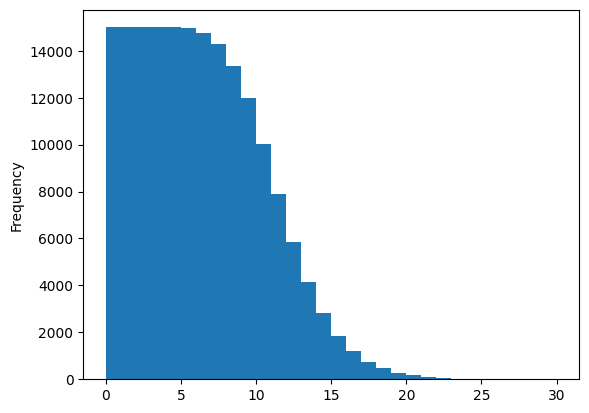

In [ ]:
from pandas.core.arrays.interval import value_counts
import matplotlib.pyplot as plt
train_df.line_number.plot.hist(bins=30)

In [ ]:
# One-hot-encoding the valuers of line number column
train_line_number_hot = tf.one_hot(train_df['line_number'].to_numpy(), depth=15)
val_line_number_hot = tf.one_hot(val_df['line_number'].to_numpy(), depth=15)
test_line_numbers_hot = tf.one_hot(test_df['line_number'].to_numpy(), depth=15)
train_line_number_hot, train_line_number_hot.shape

(<tf.Tensor: shape=(180040, 15), dtype=float32, numpy=
 array([[1., 0., 0., ..., 0., 0., 0.],
        [0., 1., 0., ..., 0., 0., 0.],
        [0., 0., 1., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)>,
 TensorShape([180040, 15]))

In [ ]:
len(train_df)

180040

### One-Hot encode the total_lines

In [ ]:
train_df['total_lines'].value_counts()

11    24468
10    23639
12    22113
9     19400
13    18438
14    14610
8     12285
15    10768
7      7464
16     7429
17     5202
6      3353
18     3344
19     2480
20     1281
5      1146
21      770
22      759
23      264
4       215
24      200
25      182
26       81
28       58
3        32
30       31
27       28
Name: total_lines, dtype: int64

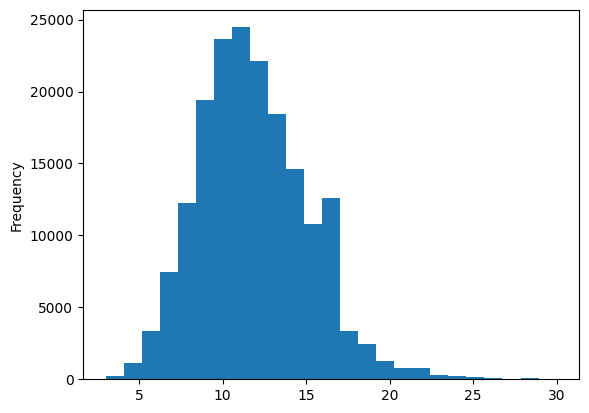

In [ ]:
train_df['total_lines'].plot.hist(bins=25);

In [ ]:
np.percentile(train_df.total_lines, 90)

16.0

In [ ]:
#one hot it
train_total_lines_hot = tf.one_hot(train_df['total_lines'].to_numpy(), depth=16)
val_total_lines_hot = tf.one_hot(val_df['total_lines'].to_numpy(), depth=16)
test_totla_lines_hot = tf.one_hot(test_df['total_lines'].to_numpy(), depth=16)

train_total_lines_hot[7], train_total_lines_hot.shape

(<tf.Tensor: shape=(16,), dtype=float32, numpy=
 array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
       dtype=float32)>,
 TensorShape([180040, 16]))

### Tribrid Embedding Model

1. Creat a model for token level feature
2. Creat a model for char level feature
3. Create a model for line number feature
4. Create a model for total lines feature
5. Combine the output of 1 and 2 `tf.keras.layers.Concatenate`
6. Combine the output of 3, 4 and 5 `tf.keras.layers.Concatenate`
7. Creat an output layer to accept the tribrid embedding and outpupt label probability
8. Combine the input of 1, 2, 3, 4 and the ouput of it into `tf.keras.Model`

In [ ]:
# 1.Token inputs
token_inputs = layers.Input(shape=[], dtype='string', name='token_inputs')
token_embeddings = tf_hub_embedding_layer(token_inputs)
outputs = layers.Dense(128, activation='sigmoid')(token_embeddings)
token_model = tf.keras.Model(token_inputs, token_embeddings)

# 2.Char
char_inputs = layers.Input(shape=(1,), dtype='string', name='char inputs')
char_vectors= char_vectorization(char_inputs)
char_embeddings = char_embed(char_vectors)
char_bi_lstm = layers.Bidirectional(layers.LSTM(24))(char_embeddings)
char_model = tf.keras.Model(char_inputs, char_bi_lstm)

# 3. line number
line_num_inputs = layers.Input(shape=(15,), dtype=tf.float32, name="line_number_input")
x = layers.Dense(32, activation="relu")(line_num_inputs)
line_num_model = tf.keras.Model(inputs=line_num_inputs,
                                   outputs=x)

# 4. total lines
total_lines_num_inputs = layers.Input(shape=(16,), dtype=tf.float32, name='total_lines_num_inputs')
x = layers.Dense(32, activation='relu')(total_lines_num_inputs)
total_lines_num_model = tf.keras.Model(total_lines_num_inputs,
                                       x)

# 5. Concatenate 1 and 2
combined_embeddings = layers.Concatenate(name='char_token_hybrid_embedding')([token_model.output,
                                                                              char_model.output])

z = layers.Dense(256, activation='relu')(combined_embeddings)
z = layers.Dropout(0.5, )(z)

# 6.
tribrid_embeddings = layers.Concatenate(name='combined_embeddings_with_positional_embeddings')([line_num_model.output,
                                                                                                total_lines_num_model.output,
                                                                                                z])

# 7.output layer
output_layer = layers.Dense(5, activation='softmax', name='output_layer')(tribrid_embeddings)
model_6 = tf.keras.Model(inputs=[line_num_model.input,
                                 total_lines_num_model.inputs,
                                 token_model.inputs,
                                 char_model.inputs],
                         outputs=output_layer)

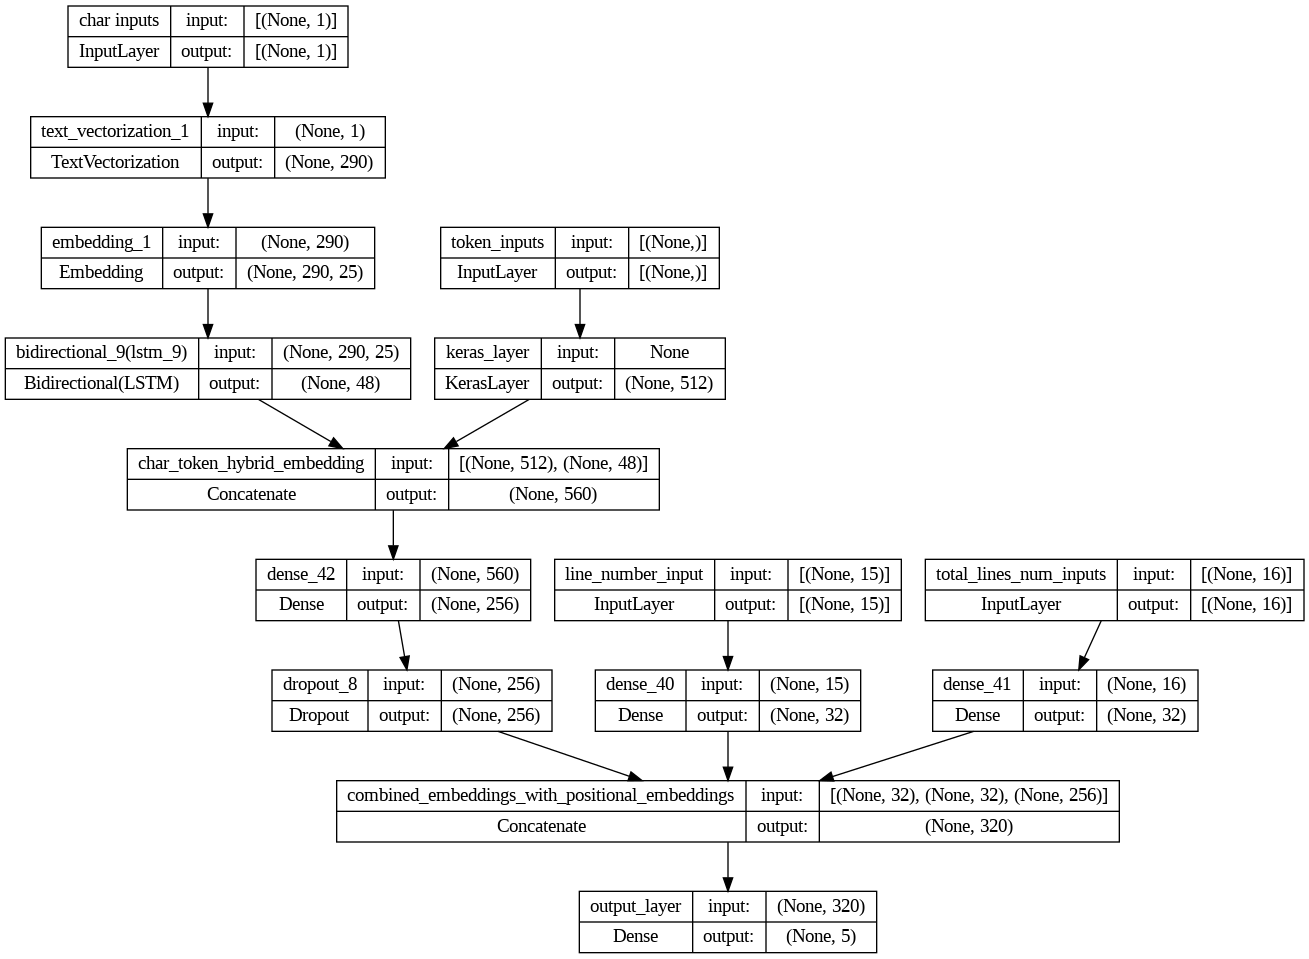

In [ ]:
from keras.utils import plot_model
plot_model(model_6, show_shapes=True)

In [ ]:
model_6.compile(loss=tf.keras.losses.CategoricalCrossentropy(label_smoothing=0.2),  #helps to prevent overfitting
                optimizer=tf.keras.optimizers.Adam(),
                metrics=['accuracy'])

What is label smoothing?

For example, if our model gets too confident on a single class (e.g. its prediction probability is really high), it may get stuck on that class and not consider other classes...

Really confident: [0.0, 0.0, 1.0, 0.0, 0.0]

What label smoothing does is it assigns some of the value from the highest pred prob to other classes, in turn, hopefully improving generalization: [0.01, 0.01, 0.96, 0.01, 0.01]

### Create tribrid Dataset

In [ ]:
train_tribrid_dataset = tf.data.Dataset.from_tensor_slices(((train_line_number_hot,
                                                             train_total_lines_hot,
                                                             train_sentences,train_chars), train_labels_one_hot)).batch(32).prefetch(tf.data.AUTOTUNE)

In [ ]:
val_tribrid_dataset = tf.data.Dataset.from_tensor_slices(((val_line_number_hot,
                                                   val_total_lines_hot,
                                                   val_sentences,
                                                   val_chars), val_labels_one_hot)).batch(32).prefetch(tf.data.AUTOTUNE)

### Fit model_6

In [ ]:
model_6_history = model_6.fit(train_tribrid_dataset,
                              epochs=3,
                              steps_per_epoch=len(train_tribrid_dataset),
                              validation_data=val_tribrid_dataset,
                              validation_steps=int(0.1*len(val_tribrid_dataset)))

Epoch 1/3
5627/5627 [==============================] - 263s 45ms/step - loss: 0.9626 - accuracy: 0.8201 - val_loss: 0.9189 - val_accuracy: 0.8467
Epoch 2/3
5627/5627 [==============================] - 254s 45ms/step - loss: 0.9241 - accuracy: 0.8490 - val_loss: 0.9109 - val_accuracy: 0.8511
Epoch 3/3
5627/5627 [==============================] - 255s 45ms/step - loss: 0.9153 - accuracy: 0.8555 - val_loss: 0.9064 - val_accuracy: 0.8531


In [ ]:
model_6.evaluate(val_tribrid_dataset)

945/945 [==============================] - 19s 20ms/step - loss: 0.9009 - accuracy: 0.8592


[0.900924801826477, 0.859161913394928]

In [ ]:
model_6_pred_prob = model_6.predict(val_tribrid_dataset)
model_6_pred = tf.argmax(model_6_pred_prob, axis=1)
model_6_pred

945/945 [==============================] - 21s 19ms/step


<tf.Tensor: shape=(30212,), dtype=int64, numpy=array([0, 0, 3, ..., 4, 4, 1])>

In [ ]:
model_6_resultes = calculate_results(val_labels_one_hot,
                                     model_6_pred)